# Fish species predictor

## 1- Importing the liberires and the data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_path = '../input/fish-market/Fish.csv'
data = pd.read_csv(data_path)

## 2- Exploring the data

In [3]:
print(data.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [4]:
print(data.Species.unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


#### We have 7 features at all 
#### One of the features is Species which we want to use it the as output we have 6 different classes

**['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']**

In [5]:
print(data.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


### We have no missing data

In [6]:
print(data.describe().transpose())

         count        mean         std     min        25%       50%       75%  \
Weight   159.0  398.326415  357.978317  0.0000  120.00000  273.0000  650.0000   
Length1  159.0   26.247170    9.996441  7.5000   19.05000   25.2000   32.7000   
Length2  159.0   28.415723   10.716328  8.4000   21.00000   27.3000   35.5000   
Length3  159.0   31.227044   11.610246  8.8000   23.15000   29.4000   39.6500   
Height   159.0    8.970994    4.286208  1.7284    5.94480    7.7860   12.3659   
Width    159.0    4.417486    1.685804  1.0476    3.38565    4.2485    5.5845   

              max  
Weight   1650.000  
Length1    59.000  
Length2    63.400  
Length3    68.000  
Height     18.957  
Width       8.142  


### Weight have a big STD for this we will normalize it later 

## 3- Data Preprocessing

#### 3.1- Normalizing the data: first lets drop categorical feature

In [7]:
Y = data['Species']
data = data.drop(['Species'], axis=1)


In [8]:
names= data.columns

In [9]:
from sklearn.preprocessing import Normalizer

In [10]:
norms= Normalizer().fit(data)
data_norms=norms.transform(data)
data_norms= np.asarray(data_norms)

In [11]:
nomred_data = pd.DataFrame(data_norms)

In [12]:
nomred_data

,0,1,2,3,4,5
0,0.981470,0.094091,0.103014,0.121670,0.046721,0.016304
1,0.985942,0.081595,0.089415,0.106074,0.042429,0.014638
2,0.989711,0.069571,0.077139,0.090529,0.036031,0.013670
3,0.989406,0.071684,0.079043,0.091309,0.034697,0.012144
4,0.992301,0.061153,0.066923,0.078461,0.028717,0.011848
...,...,...,...,...,...,...
154,0.491631,0.463423,0.491631,0.539988,0.084238,0.056159
155,0.521604,0.455430,0.482678,0.525497,0.094589,0.049397
156,0.474363,0.470475,0.505469,0.536574,0.088535,0.048828
157,0.619759,0.415270,0.449875,0.478189,0.090378,0.065034


In [13]:
nomred_data.columns =names

In [14]:
print(nomred_data)

       Weight   Length1   Length2   Length3    Height     Width
0    0.981470  0.094091  0.103014  0.121670  0.046721  0.016304
1    0.985942  0.081595  0.089415  0.106074  0.042429  0.014638
2    0.989711  0.069571  0.077139  0.090529  0.036031  0.013670
3    0.989406  0.071684  0.079043  0.091309  0.034697  0.012144
4    0.992301  0.061153  0.066923  0.078461  0.028717  0.011848
..        ...       ...       ...       ...       ...       ...
154  0.491631  0.463423  0.491631  0.539988  0.084238  0.056159
155  0.521604  0.455430  0.482678  0.525497  0.094589  0.049397
156  0.474363  0.470475  0.505469  0.536574  0.088535  0.048828
157  0.619759  0.415270  0.449875  0.478189  0.090378  0.065034
158  0.603857  0.418755  0.455169  0.491582  0.088976  0.057024

[159 rows x 6 columns]


#### 3.2- Categorical to numerical

In [15]:
Y= Y.replace({"Bream": 0, "Roach": 1,
              "Whitefish":2, "Parkki":3, 
              "Perch":4, "Pike":5, "Smelt":6})

In [16]:
print(Y.unique())

[0 1 2 3 4 5 6]


#### 3.3- Compain all the data togather for visualization

In [17]:
data_prepared = pd.concat([nomred_data,Y], axis=1)

In [18]:
print(data_prepared)

       Weight   Length1   Length2   Length3    Height     Width  Species
0    0.981470  0.094091  0.103014  0.121670  0.046721  0.016304        0
1    0.985942  0.081595  0.089415  0.106074  0.042429  0.014638        0
2    0.989711  0.069571  0.077139  0.090529  0.036031  0.013670        0
3    0.989406  0.071684  0.079043  0.091309  0.034697  0.012144        0
4    0.992301  0.061153  0.066923  0.078461  0.028717  0.011848        0
..        ...       ...       ...       ...       ...       ...      ...
154  0.491631  0.463423  0.491631  0.539988  0.084238  0.056159        6
155  0.521604  0.455430  0.482678  0.525497  0.094589  0.049397        6
156  0.474363  0.470475  0.505469  0.536574  0.088535  0.048828        6
157  0.619759  0.415270  0.449875  0.478189  0.090378  0.065034        6
158  0.603857  0.418755  0.455169  0.491582  0.088976  0.057024        6

[159 rows x 7 columns]


#### Now the data is normalized and numerical so its ready to make some visualization
<img src="https://media.makeameme.org/created/wohooo-0392028a2b.jpg">

## 4- Data Visualization

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>,
        <AxesSubplot:title={'center':'Length2'}>],
       [<AxesSubplot:title={'center':'Length3'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>],
       [<AxesSubplot:title={'center':'Species'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

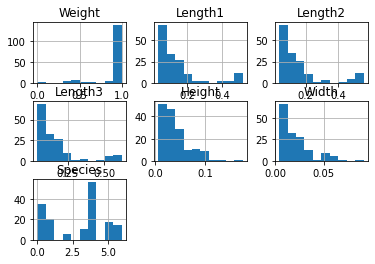

In [19]:
data_prepared.hist()

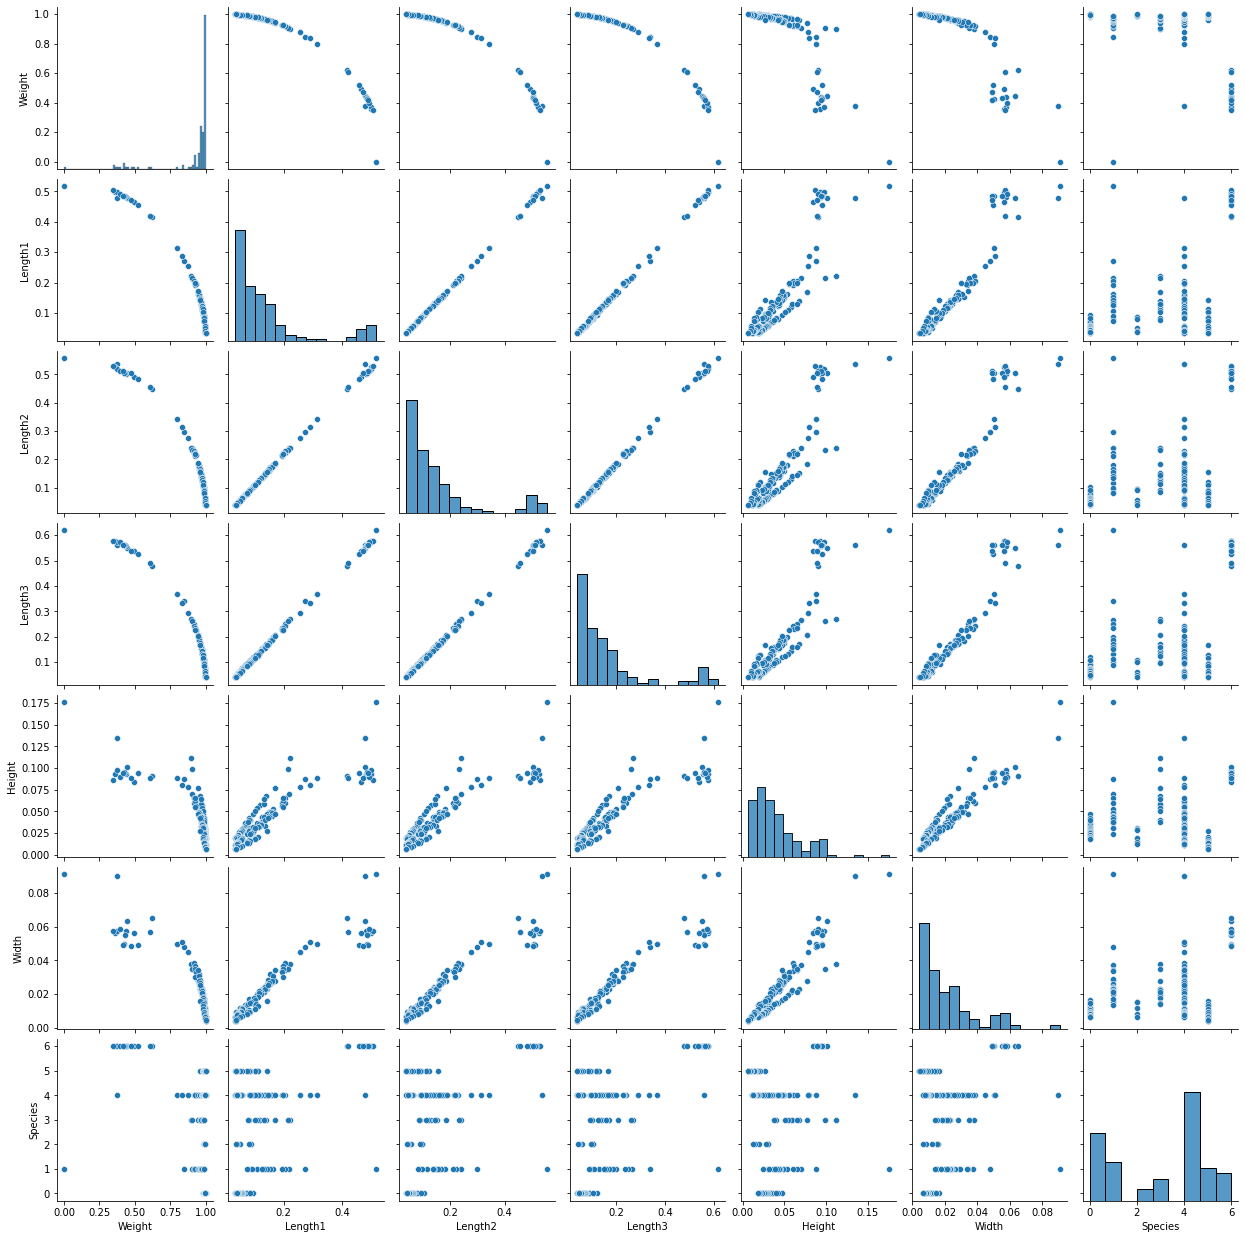

In [20]:
sns.pairplot(data_prepared)

#### 4.1- Find the Outliers

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='Width'>

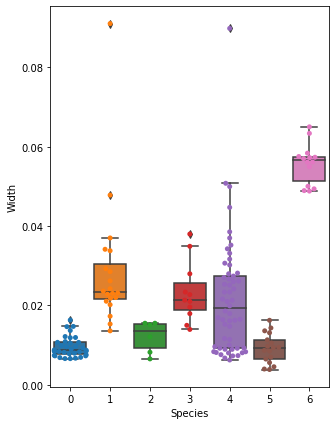

In [21]:
plt.figure(figsize=(5,7))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Width'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Width'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='Height'>

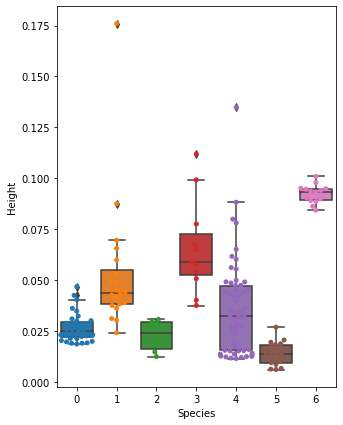

In [22]:
plt.figure(figsize=(5,7))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Height'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Height'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='Length1'>

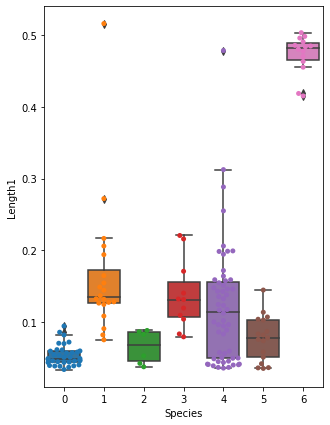

In [23]:
plt.figure(figsize=(5,7))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Length1'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Length1'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='Length2'>

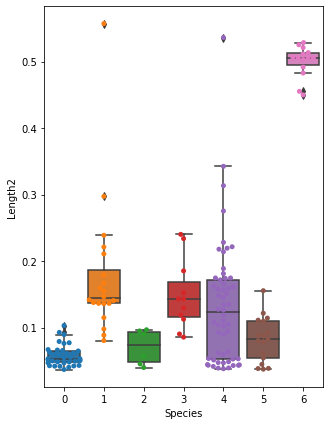

In [24]:
plt.figure(figsize=(5,7))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Length2'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Length2'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='Length3'>

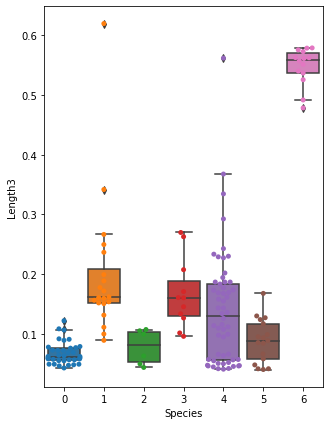

In [25]:
plt.figure(figsize=(5,7))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Length3'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Length3'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='Width'>

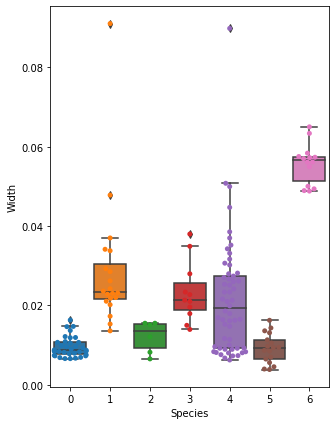

In [26]:
plt.figure(figsize=(5,7))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Width'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Width'])

#### By lookint to the plotting we can see that there is 3 Outliers Let's drop them!!!

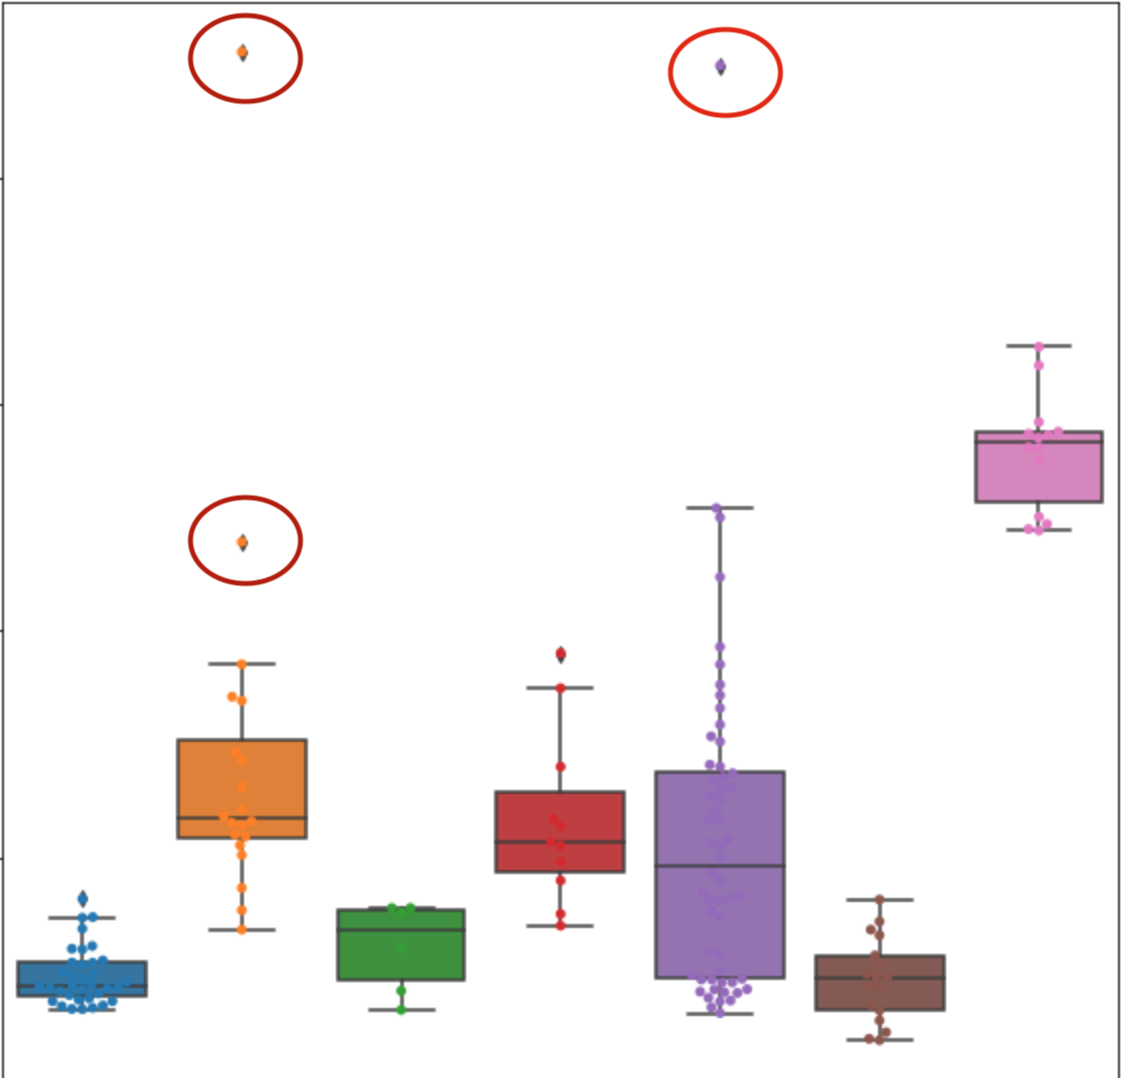

#### 4.2- Droping outliers

In [27]:
print(data_prepared['Width'].max())

0.09107570235510182


#### 4.2.1- Get the index of the outlier and drop

In [28]:
data_4_cat= data_prepared.loc[data_prepared.Species==4]
print(data_4_cat['Width'].idxmax())
indx_to_drop = data_4_cat['Width'].idxmax()
data_prepared =data_prepared.drop([indx_to_drop], axis=0)

data_1_cat= data_prepared.loc[data_prepared.Species==1]
print(data_1_cat['Width'].idxmax())
indx_to_drop = data_1_cat['Width'].idxmax()
data_prepared =data_prepared.drop([indx_to_drop], axis=0)

data_1_cat= data_prepared.loc[data_prepared.Species==1]
print(data_1_cat['Width'].idxmax())
indx_to_drop = data_1_cat['Width'].idxmax()
data_prepared =data_prepared.drop([indx_to_drop], axis=0)


72
40
35


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='Width'>

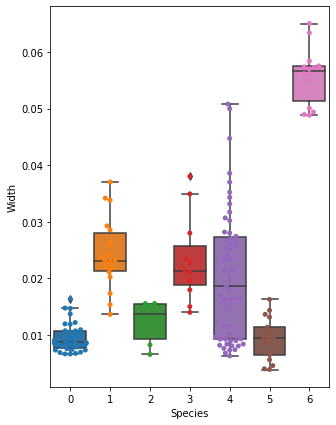

In [29]:
plt.figure(figsize=(5,7))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Width'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Width'])

#### We don't have Outlierssssss  🥳🥳🥳🥳🥳

<img src="https://i2.wp.com/novocom.top/image/bWVkalwaHkWEuZ2lwaHkuY29t/media/3o6ZsXoYhtUlGEyIRa/giphy.gif">

## 5- Preparing the model and the data for training

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [31]:
SVC = SVC()

In [32]:
parameters = {'C': [10,100,1000], 'gamma': [4,5,6,7],
              'kernel': ['rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC, parameters, n_jobs=20, cv=6, refit=True,verbose=10)


In [33]:
Y = data_prepared['Species']
X= data_prepared.drop(['Species'], axis=1)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=40, test_size=0.3)

In [35]:
grid_search.fit(X_train, Y_train)

Fitting 6 folds for each of 36 candidates, totalling 216 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:    7.1s
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    7.2s
[Parallel(n_jobs=20)]: Done  45 tasks      | elapsed:    7.6s
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    7.9s
[Parallel(n_jobs=20)]: Done  73 tasks      | elapsed:    8.2s
[Parallel(n_jobs=20)]: Done  88 tasks      | elapsed:    8.6s
[Parallel(n_jobs=20)]: Done 105 tasks      | elapsed:    9.0s
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:    9.5s
[Parallel(n_jobs=20)]: Done 141 tasks      | elapsed:    9.9s
[Parallel(n_jobs=20)]

GridSearchCV(cv=6, estimator=SVC(), n_jobs=20,
             param_grid={'C': [10, 100, 1000], 'gamma': [4, 5, 6, 7],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=10)

In [36]:
print("Best parameters for SVC Clasiifier",grid_search.best_estimator_)

Best parameters for SVC Clasiifier SVC(C=1000, gamma=5, kernel='poly')


## 6- Evaluate the model

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
preds = grid_search.predict(X_test)

In [39]:
score= accuracy_score(Y_test, preds)
print("_Accuracy = %",score*100)

_Accuracy = % 97.87234042553192


# The End....

<img src="https://giffiles.alphacoders.com/105/105882.gif">